## Exploratory Data Analysis

#### วิเคราะห์ข้อมูลของ IMDB Dataset

In [ ]:
#Library ที่ใช้สำหรับการวิเคราะห์ข้อมูล
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("D:/CS303/IMDB Dataset.csv")
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
print("Total number of review", len(df))
print("\n Total number of review by sentiment")
print(df['sentiment'].value_counts())

Total number of review 50000

 Total number of review by sentiment
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [8]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [11]:
df['review_len_words'] = df['review'].apply(lambda x: len(str(x).split()))

average_word_count = df['review_len_words'].mean()

print(f"Average word count is {average_word_count:.2f} words")

df['review_len_chars'] = df['review'].apply(lambda x: len(str(x)))

average_char_count = df['review_len_chars'].mean()

print(f"Average number of characters in all reviews is {average_char_count:.2f} characters")

Average word count is 231.16 words
Average number of characters in all reviews is 1309.43 characters


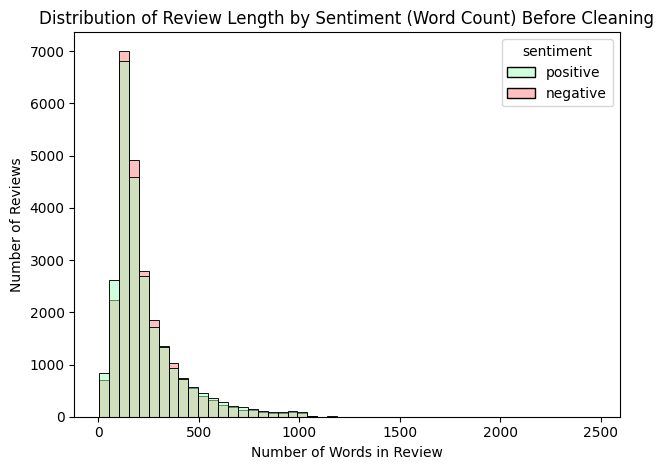

In [12]:
df_review_length = pd.DataFrame({
    'review': df['review'],
    'sentiment': df['sentiment'],
    'review_len_words': df['review'].apply(lambda x: len(x.split())),
    'review_len_chars': df['review'].apply(len)
})


sns.histplot(data=df_review_length, x='review_len_words', hue='sentiment',
             bins=50, palette={'positive': '#a2ffbc', 'negative': '#ff8282'})

plt.title("Distribution of Review Length by Sentiment (Word Count) Before Cleaning")
plt.xlabel("Number of Words in Review")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


In [ ]:
short_reviews = df_review_length[df_review_length['review_len_words'] < 100]


short_review_counts = short_reviews['sentiment'].value_counts()

print("Number of reviews with less than 100 words:")
print(short_review_counts)

Number of reviews with less than 200 words:
sentiment
positive    3274
negative    2743
Name: count, dtype: int64


In [14]:
medium_reviews = df_review_length[(df_review_length['review_len_words'] >= 100) & 
                                   (df_review_length['review_len_words'] <= 400)]


# นับจำนวนตาม sentiment
medium_reviews_counts = medium_reviews['sentiment'].value_counts()


print("Number of reviews between 100-400 words in length :")
print(medium_reviews_counts)

Number of reviews between 100-400 words in length :
sentiment
negative    19184
positive    18315
Name: count, dtype: int64


In [15]:
สนืเ_reviews = df_review_length[df_review_length['review_len_words'] > 400]

# นับจำนวนตาม sentiment
short_review_counts = short_reviews['sentiment'].value_counts()

print("Number of reviews with more than 400 words:")
print(short_review_counts)

Number of reviews with more than 400 words:
sentiment
positive    3274
negative    2743
Name: count, dtype: int64


In [16]:
mean_lengths = df_review_length.groupby('sentiment')[['review_len_words', 'review_len_chars']].mean()

print("Average review length by sentiment:")
print(mean_lengths)

Average review length by sentiment:
           review_len_words  review_len_chars
sentiment                                    
negative          229.46456        1294.06436
positive          232.84932        1324.79768


In [17]:
print("Length of reviews in Words")
print(df_review_length['review_len_words'].describe())

Length of reviews in Words
count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_len_words, dtype: float64


In [18]:
print("Length of reviews in Characters")
print(df_review_length['review_len_chars'].describe())

Length of reviews in Characters
count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_len_chars, dtype: float64


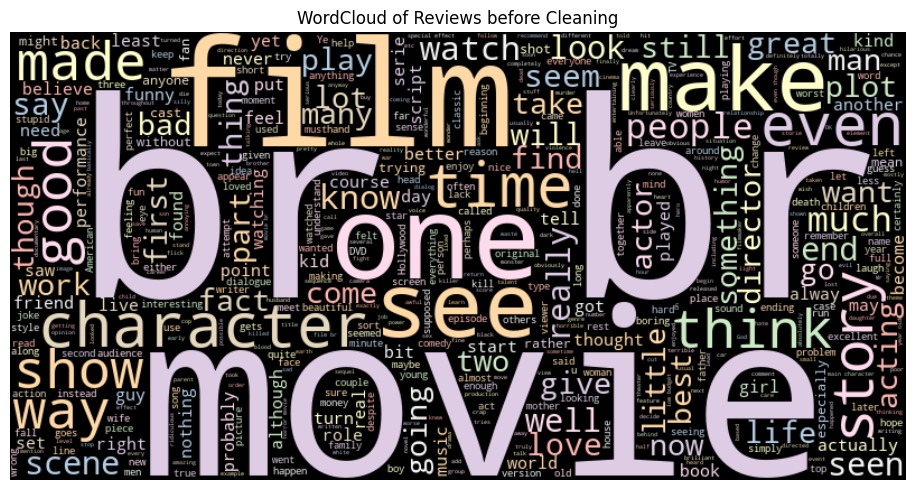

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
wc = WordCloud(
    max_words=500,
    width=800,
    height=400,
    background_color='black',
    colormap='Pastel1'
).generate(" ".join(df['review']))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Reviews before Cleaning")
plt.tight_layout()
plt.show()


In [20]:
from nltk.corpus import stopwords
import string

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
from bs4 import BeautifulSoup
import re
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

<>:9: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\['
C:\Users\lenovo\AppData\Local\Temp\ipykernel_26632\2129755489.py:9: SyntaxWarning: invalid escape sequence '\['
  return re.sub('\[[^]]*\]', '', text)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_26632\2129755489.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [25]:
df.loc[1, 'review']

'wonderful little filming technique fashion gives sometimes sense realism entire actors extremely well michael sheen got voices pat truly see seamless editing guided references diary well worth watching terrificly written performed masterful production one great comedy realism really comes home little fantasy guard rather use traditional techniques remains solid plays knowledge particularly scenes concerning orton halliwell sets flat murals decorating every terribly well'

In [27]:
df.sentiment.replace("positive" , 1 , inplace = True)
df.sentiment.replace("negative" , 0 , inplace = True)
df = df.drop('review_len_words', axis=1)
df = df.drop('review_len_chars', axis=1)
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ex...,1
1,wonderful little filming technique fashion giv...,1
2,thought wonderful way spend time hot summer si...,1
3,basically family little boy thinks zombie clos...,0
4,petter time visually stunning film mattei offe...,1


In [29]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.review)
corpus[:5]

['one', 'reviewers', 'mentioned', 'watching', 'oz']

In [30]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'movie': 61496,
 'film': 55088,
 'one': 45067,
 'like': 37303,
 'would': 23815,
 'even': 23720,
 'good': 23475,
 'really': 21806,
 'see': 20906,
 'get': 17692}

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
def get_top_text_ngrams(corpus, n, ngram_range):
    vec = tfidf(ngram_range=ngram_range).fit(corpus)
    tfidf_matrix = vec.transform(corpus)
    
    sum_tfidf = tfidf_matrix.sum(axis=0)
    words_tfidf = [(word, sum_tfidf[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_tfidf = sorted(words_tfidf, key=lambda x: x[1], reverse=True)
    return words_tfidf[:n]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_26632\2499639930.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Common_words', data=temp, palette='pastel')


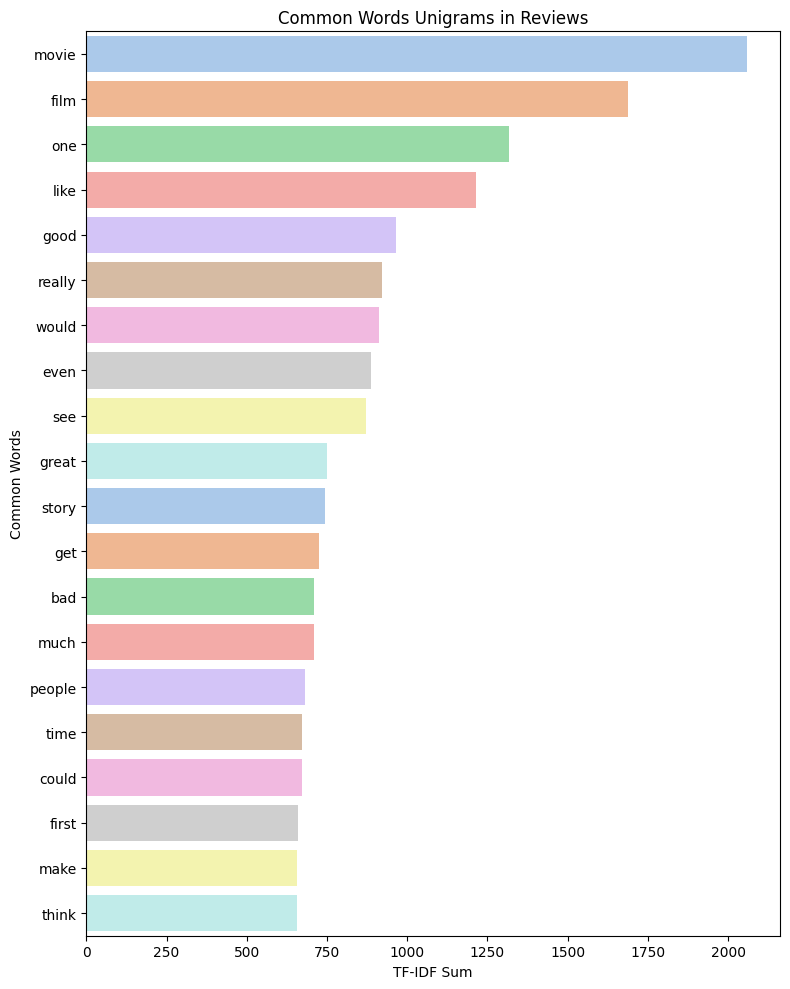

In [33]:
most_common_uni = get_top_text_ngrams(df.review, 20, (1,1))
most_common_uni = dict(most_common_uni)

temp = pd.DataFrame({
    "Common_words": list(most_common_uni.keys()),
    "Count": list(most_common_uni.values())
})

plt.figure(figsize=(8, 10))
sns.barplot(x='Count', y='Common_words', data=temp, palette='pastel') 
plt.title('Common Words Unigrams in Reviews')
plt.xlabel('TF-IDF Sum')
plt.ylabel('Common Words')
plt.tight_layout()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_26632\3328458124.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Common_words', data=temp, palette='pastel')  # ใช้พาเลตต์สีที่ seaborn มี


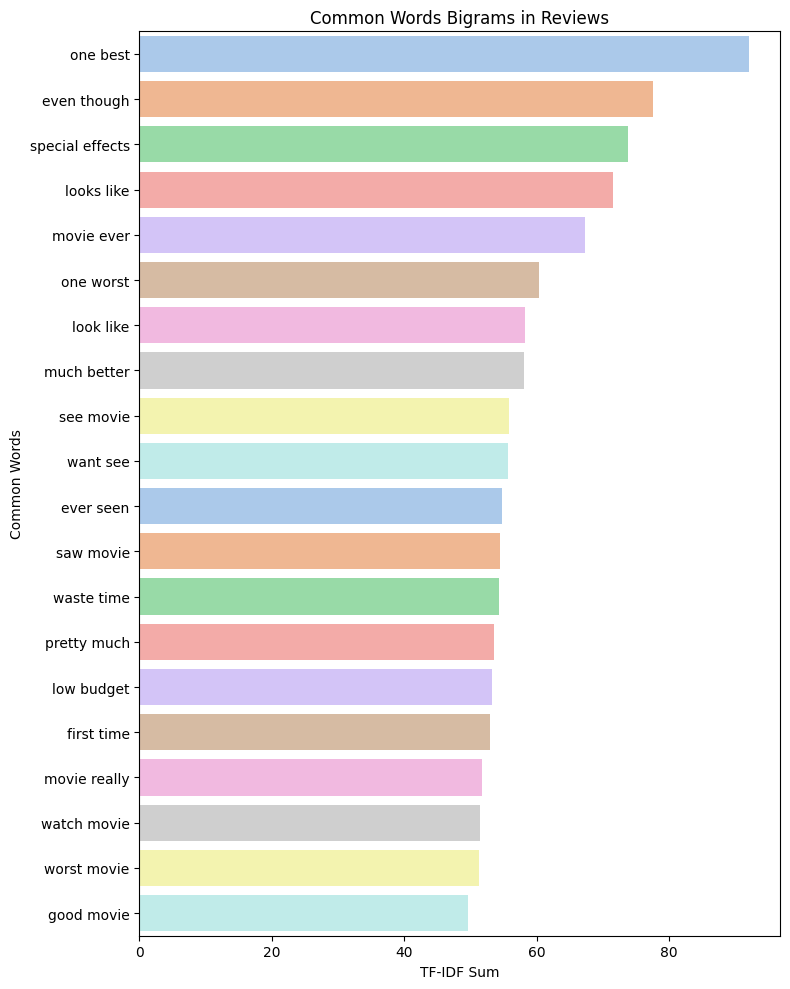

In [34]:
most_common_uni = get_top_text_ngrams(df.review, 20, (2,2))
most_common_uni = dict(most_common_uni)

temp = pd.DataFrame({
    "Common_words": list(most_common_uni.keys()),
    "Count": list(most_common_uni.values())
})

plt.figure(figsize=(8, 10))
sns.barplot(x='Count', y='Common_words', data=temp, palette='pastel')  # ใช้พาเลตต์สีที่ seaborn มี
plt.title('Common Words Bigrams in Reviews')
plt.xlabel('TF-IDF Sum')
plt.ylabel('Common Words')
plt.tight_layout()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_26632\2395412650.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Common_words', data=temp, palette='pastel')  # ใช้พาเลตต์สีที่ seaborn มี


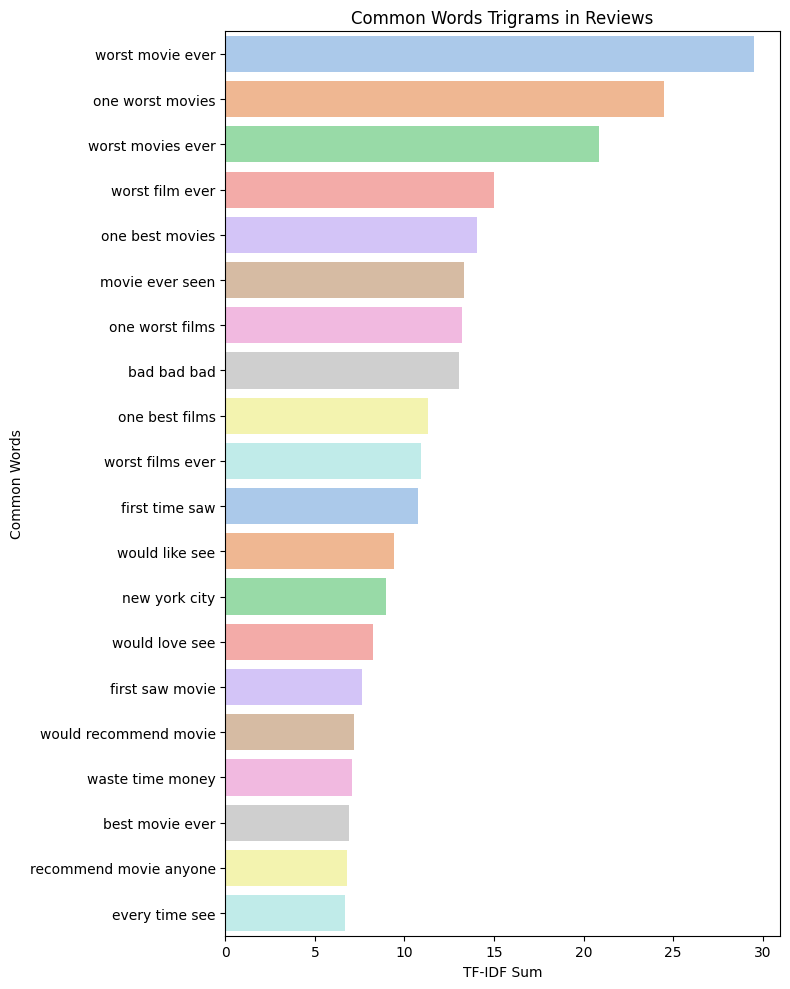

In [35]:
most_common_uni = get_top_text_ngrams(df.review, 20, (3,3))
most_common_uni = dict(most_common_uni)

temp = pd.DataFrame({
    "Common_words": list(most_common_uni.keys()),
    "Count": list(most_common_uni.values())
})

plt.figure(figsize=(8, 10))
sns.barplot(x='Count', y='Common_words', data=temp, palette='pastel')  # ใช้พาเลตต์สีที่ seaborn มี
plt.title('Common Words Trigrams in Reviews')
plt.xlabel('TF-IDF Sum')
plt.ylabel('Common Words')
plt.tight_layout()
plt.show()


In [36]:
from collections import Counter
words = [word for sent in df['review'] for word in sent.split()]
words[:10]

['one',
 'reviewers',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'exactly',
 'happened',
 'first',
 'thing']

In [37]:
freq_words = Counter(words)
freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)
freq_words_df = pd.DataFrame(freq_words_sorted[:20], columns=['word', 'counts'])

In [38]:
freq_words_df.head(10)

,word,counts
0,movie,61496
1,film,55088
2,one,45067
3,like,37303
4,would,23815
5,even,23720
6,good,23475
7,really,21806
8,see,20906
9,get,17692


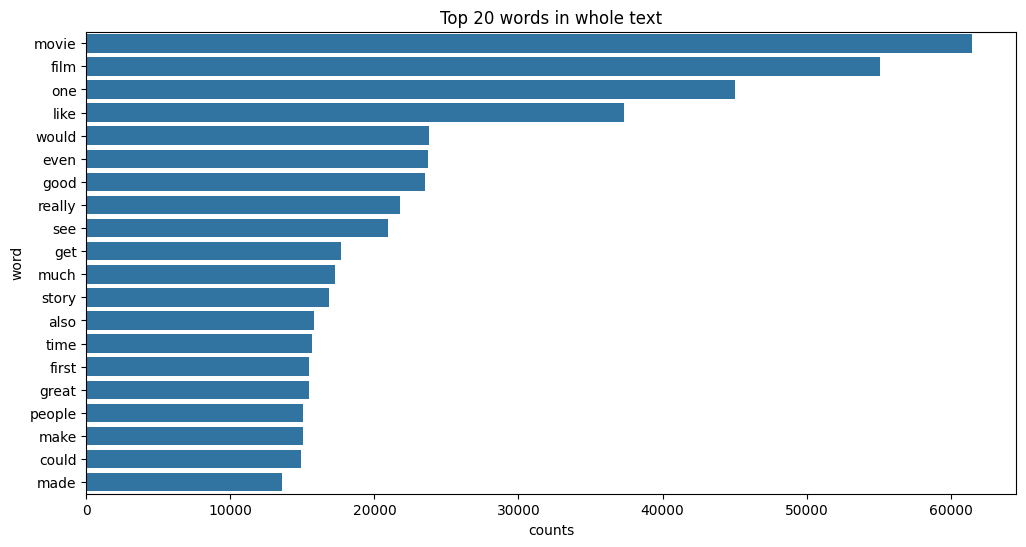

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(data= freq_words_df , x= 'counts', y= 'word')
plt.title('Top 20 words in whole text')
plt.show()

#### Explore data Bad Word
0 คือ Negative Class
1 คือ Positive Class

In [40]:
import pandas as pd
import re

#List of bad words
bad_words = ['stupid', 'idiot', 'bad', 'terrible', 'awful', 'worst', 'suck', 'dumb', 'ugly', 'scam','liar'
             ,'trash','useless','boring','overpriced','disapointing']

def contains_bad_word(text, bad_words):
    pattern = r'\b(' + '|'.join(re.escape(word) for word in bad_words) + r')\b'
    return bool(re.search(pattern, text.lower()))

has_bad_word_list = []
sentiment_list = []


for _, row in df.iterrows():
    review = row['review']
    sentiment = row['sentiment']
    has_bad_word = contains_bad_word(review, bad_words)
    
    has_bad_word_list.append(has_bad_word)
    sentiment_list.append(sentiment)


df_badword_check = pd.DataFrame({
    'sentiment': sentiment_list,
    'has_bad_word': has_bad_word_list
})


summary = df_badword_check.groupby(['sentiment', 'has_bad_word']).size().unstack()
summary.columns = ['No Bad Word', 'Has Bad Word']
summary = summary.fillna(0).astype(int)


print(summary)


           No Bad Word  Has Bad Word
sentiment                           
0                12169         12831
1                20998          4002


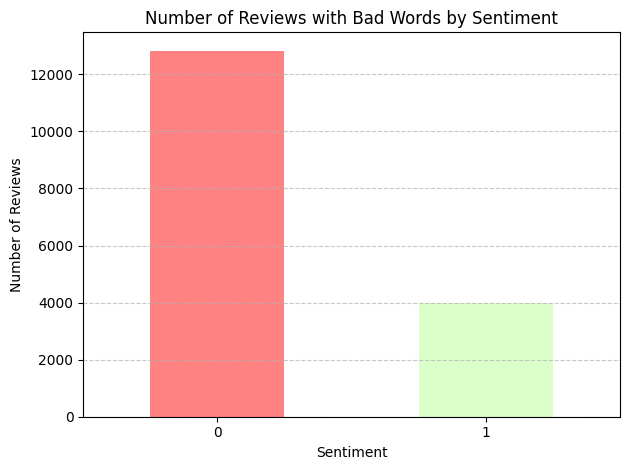

In [41]:
import matplotlib.pyplot as plt

bad_word_counts = df_badword_check[df_badword_check['has_bad_word'] == True]['sentiment'].value_counts()


bad_word_counts.plot(kind='bar', color=['#FF8282', '#DBFFCB'])


plt.title("Number of Reviews with Bad Words by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
